In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib
import streamlit as st

In [ ]:
df = pd.read_csv('/Users/lokeshwarans/Downloads/science/datasets/crop_recommendation.csv')  # Change the path if needed

# View first few records
print(df.head())
print(df.info())
print(df.isnull().sum())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
print("Shape of Dataset:", df.shape)
df.info()


Shape of Dataset: (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Duplicate Rows: 0


In [14]:
df = df.drop_duplicates()


In [15]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


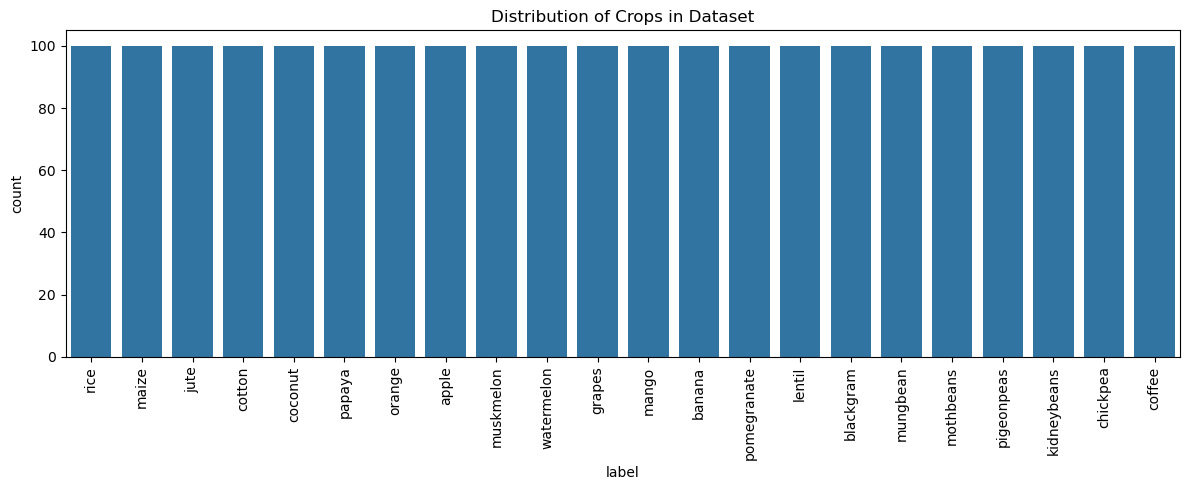

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Distribution of Crops in Dataset")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


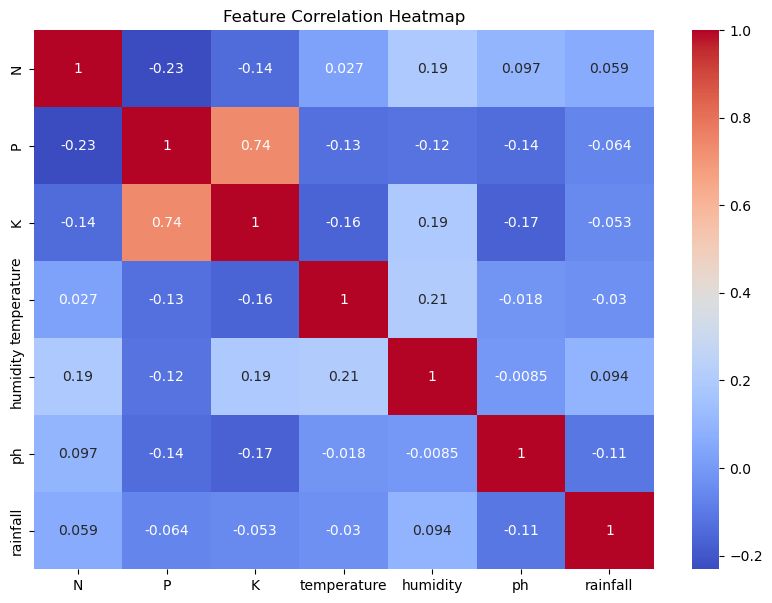

In [18]:
plt.figure(figsize=(10, 7))

# Drop non-numeric (object or category) columns before correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Feature Correlation Heatmap")
plt.show()


In [19]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [21]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [22]:
y_pred = rf_model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.9931818181818182
📊 Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00 

In [23]:
# Sample values: N, P, K, temp, humidity, pH, rainfall
sample = np.array([[90, 42, 43, 20.5, 82.0, 6.5, 202.0]])
prediction = rf_model.predict(sample)

print("🌾 Recommended Crop:", prediction[0])


🌾 Recommended Crop: rice


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
import joblib

# Load the saved model
model = joblib.load('/Users/lokeshwarans/Downloads/science/crop_recommendation_rf_model.pkl')

# 10 sample inputs without labels (N, P, K, Temperature, Humidity, pH, Rainfall)
sample_data = [
    [90, 42, 43, 20.87, 82.00, 6.50, 140.93],
    [85, 58, 41, 21.77, 80.32, 7.00, 226.55],
    [60, 55, 60, 23.00, 85.00, 6.80, 70.00],
    [95, 48, 45, 21.00, 80.00, 6.70, 50.00],
    [70, 50, 50, 22.00, 84.00, 6.60, 100.00],
    [80, 40, 35, 24.00, 78.00, 6.40, 150.00],
    [75, 52, 47, 25.00, 81.00, 6.90, 300.00],
    [88, 60, 55, 20.00, 79.00, 7.20, 220.00],
    [68, 45, 40, 23.50, 83.00, 6.30, 120.00],
    [78, 35, 48, 22.50, 85.00, 6.90, 190.00]
]

# Predict crops
predictions = model.predict(sample_data)

# Display predictions
for i, crop in enumerate(predictions, 1):
    print(f"Sample {i}: Recommended Crop = {crop}")


Sample 1: Recommended Crop = rice
Sample 2: Recommended Crop = rice
Sample 3: Recommended Crop = papaya
Sample 4: Recommended Crop = watermelon
Sample 5: Recommended Crop = papaya
Sample 6: Recommended Crop = jute
Sample 7: Recommended Crop = rice
Sample 8: Recommended Crop = rice
Sample 9: Recommended Crop = jute
Sample 10: Recommended Crop = rice


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
joblib.dump(rf_model, "crop_recommendation_rf_model.pkl")
print("✅ Model saved as 'crop_recommendation_rf_model.pkl'")

✅ Model saved as 'crop_recommendation_rf_model.pkl'


In [25]:
import joblib
model = joblib.load('/Users/lokeshwarans/Downloads/science/crop_recommendation_rf_model.pkl')

 **model evaluation**


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")


✅ Accuracy Score: 0.9932


/var/folders/zk/zh0vmc_51339n7wyczqhy68h0000gn/T/ipykernel_58777/3880835579.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


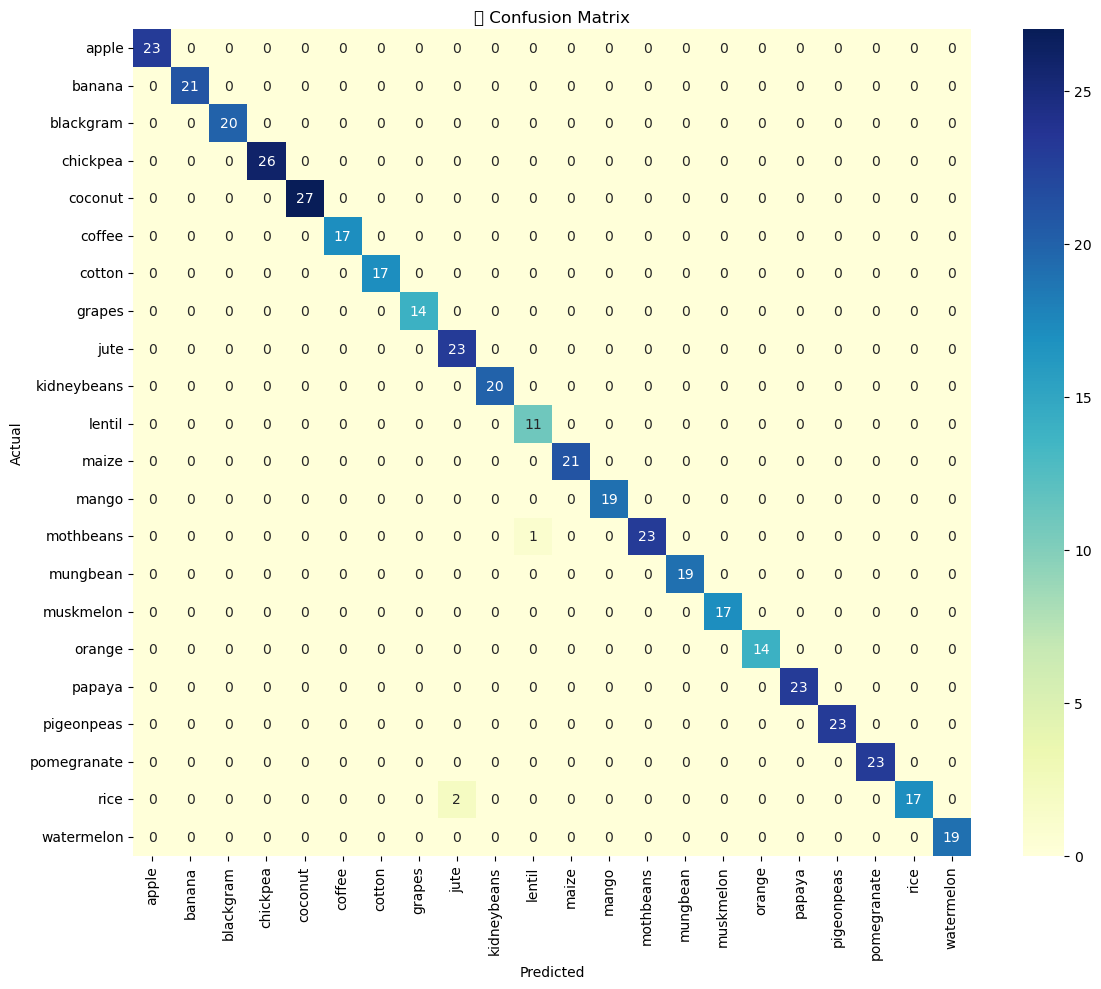

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, cmap="YlGnBu")
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("📄 Classification Report:\n")
print(report)


📄 Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
 

In [30]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.head()


,precision,recall,f1-score,support
apple,1.0,1.0,1.0,23.0
banana,1.0,1.0,1.0,21.0
blackgram,1.0,1.0,1.0,20.0
chickpea,1.0,1.0,1.0,26.0
coconut,1.0,1.0,1.0,27.0


/var/folders/zk/zh0vmc_51339n7wyczqhy68h0000gn/T/ipykernel_58777/3274758003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")
/var/folders/zk/zh0vmc_51339n7wyczqhy68h0000gn/T/ipykernel_58777/3274758003.py:9: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


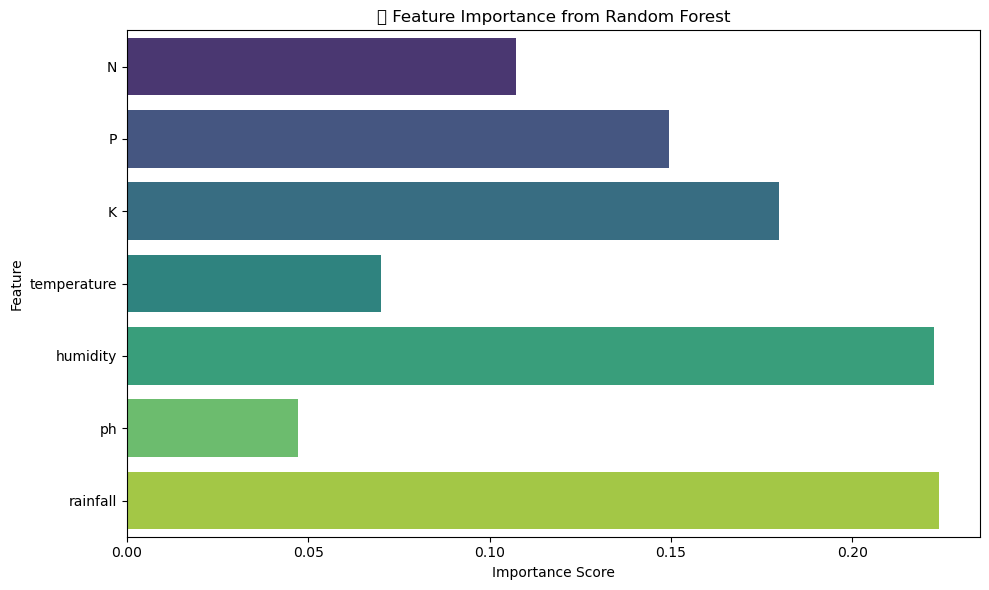

In [31]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("🌿 Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.99772727 0.99545455 0.99545455 0.99318182 0.98409091]
Mean CV Accuracy: 0.9931818181818182


##### complete

In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.1.95:8502

^C
